# Exercise-3.1

> Sample survey: Suppose we are going to sample $100$ individuals from a county (of size much larger than 100) and ask each sampled person whether they support policy $Z$ or not. Let $Y_i = 1$ if person $i$ in the sample supports the policy, and $Y_i = 0$ otherwise.

##### Solution

> a) Assume $Y_1, ... , Y_{100}$ are, conditional on $\theta$, i.i.d. binary random variables with expectation $\theta$. Write down the joint distribution of $Pr(Y_1 = y_1, . . . , Y_{100} = y_{100}|\theta)$ in a compact form. Also write down the form of $Pr(\sum_{i}Y_i = y|\theta)$.

Every individual is modeled by Bernoulli distribution:
$$
\begin{equation}
\begin{split}
Pr(Y_i = y_i|\theta) &= \theta^{y_i} \cdot (1 - \theta)^{1 - y_i} \\
 &= \mathrm{Bern}(Y_i = y_i | \theta)
\end{split}
\end{equation}
$$

Since all individuals are independent, then join probability:

$$
\begin{equation}
\begin{split}
Pr(Y_1 = y_1, . . . , Y_{100} = y_{100}|\theta) &= \prod_{i=1}^{100}\mathrm{Bern}(Y_i = y_i | \theta)\\
&= \prod_{i=1}^{100}\theta^{y_i} \cdot (1 - \theta)^{1-y_i}\\
&= \theta^{\sum_{i=1}^{100}y_i} \cdot (1 - \theta)^{100 - \sum_{i=1}^{100}y_i}
\end{split}
\end{equation}
$$

Compact form of $Pr(\sum_{i}Y_i = y|\theta)$:

$$
Pr(\sum_{i=1}^{100}Y_i = y|\theta) = Binom(y|100,\theta)
$$

##### Solution

> b) For the moment, suppose you believed that $\theta \in \{0.0, 0.1, . . . , 0.9, 1.0\}$. Given that the results of the survey were $\sum_{i=1}^{100}Y_i = 57$, compute $Pr(\sum_{i=1}^{100}Y_i = 57|\theta)$ for each of these 11 values of $\theta$ and plot these probabilities as a function of $\theta$.

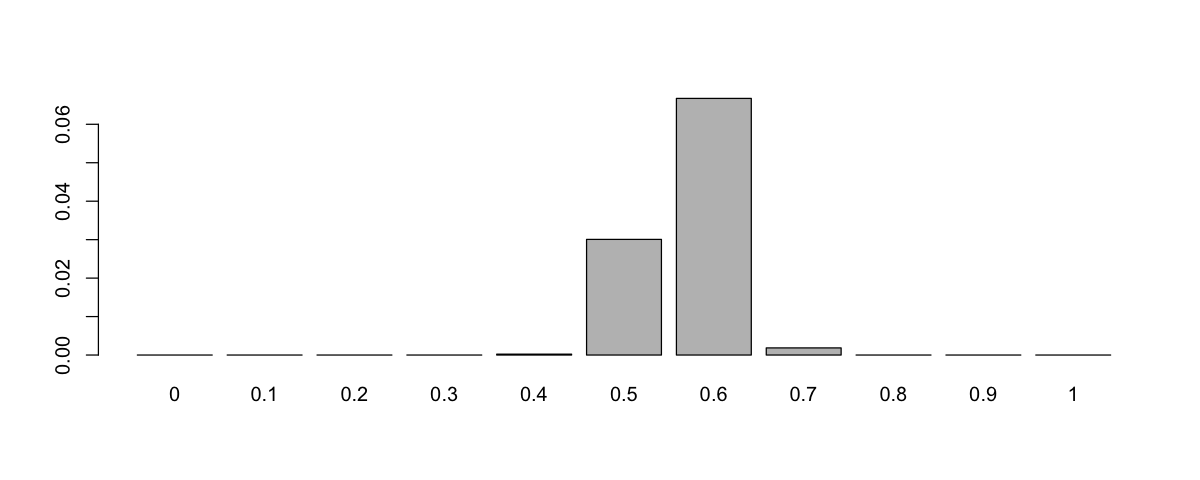

In [69]:
options(repr.plot.width=10, repr.plot.height=4)

k = 57
n = 100

theta <- seq(from=0, to=1, by=0.1)
xs <- dbinom(x=k, size=n, prob=theta)
barplot(xs, names.arg=theta)

##### Solution

> c) Now suppose you originally had no prior information to believe one of these $\theta$-values over another, and so $Pr(\theta = 0.0) = Pr(\theta = 0.1) = ... = Pr(\theta = 0.9) = Pr(\theta = 1.0)$. Use Bayes’ rule to compute $Pr(\theta|\sum_{i=1}^{n}Y_i = 57)$ for each $\theta$-value. Make a plot of this posterior distribution as a function of $\theta$.

Using Bayes rule:

$$
Pr(\theta|data) = \frac{Pr(data|\theta) \cdot Pr(\theta)}{Pr(data)} = \frac{Pr(data|\theta) \cdot Pr(\theta)}{\sum_{i=1}^{100} Pr(data|\theta_i) \cdot Pr(\theta_i)}
$$

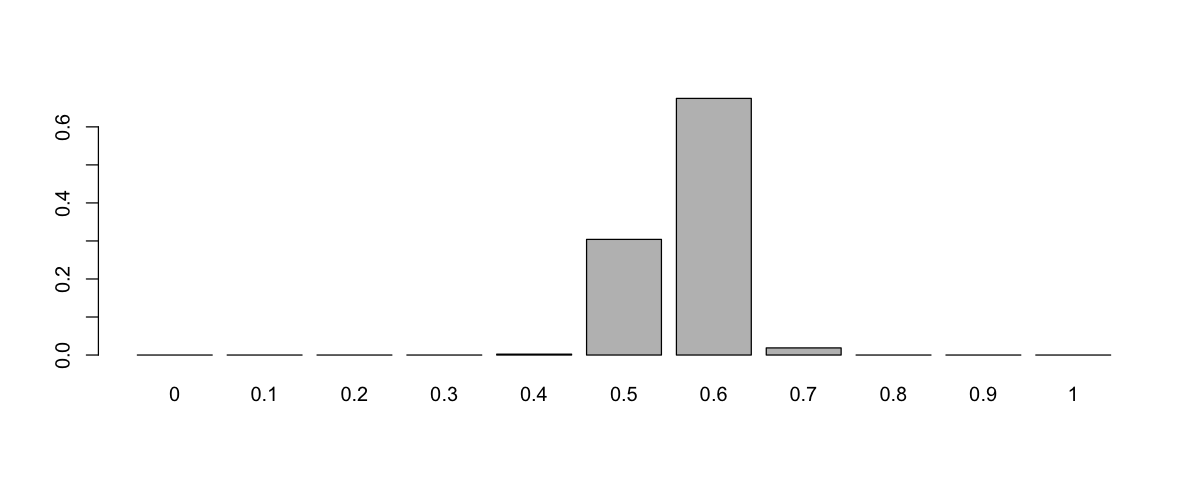

In [70]:
k = 57
n = 100

theta <- seq(from=0, to=1, by=0.1)
p_theta <- rep(1/length(theta), length(theta))
p_data_given_theta = dbinom(k, size=n, prob=theta)
likelihood = p_data_given_theta * p_theta
posterior = likelihood / sum(likelihood)
barplot(posterior, names.arg=theta)

> d) Now suppose you allow $\theta$ to be any value in the interval $[0, 1]$. Using the uniform prior density for $\theta$, so that $Pr(\theta) = 1$, plot the posterior density $Pr(\theta) \cdot Pr(\sum_{i=1}^{100}Y_i=57|\theta)$ as a function of $\theta$.

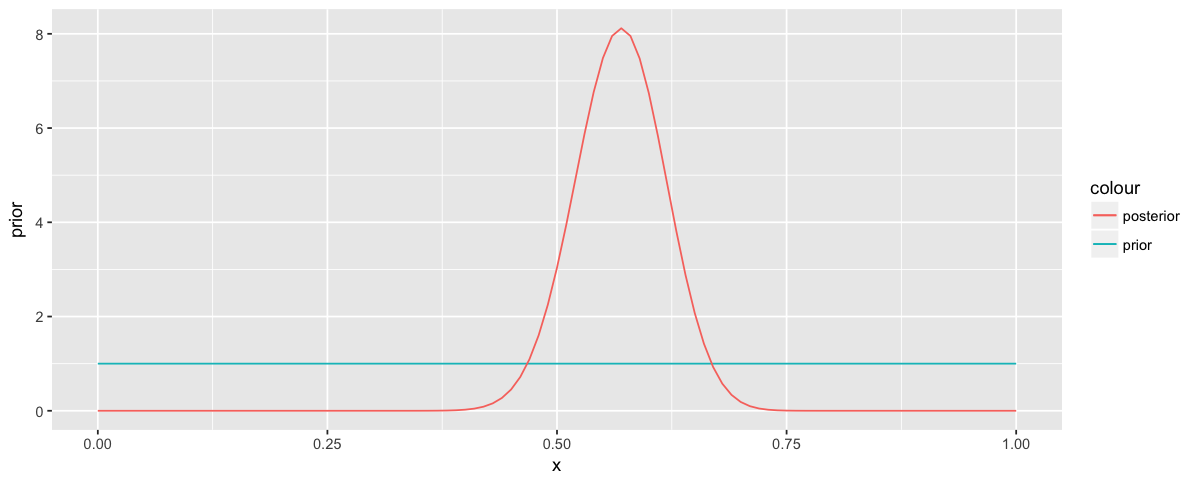

In [74]:
library(ggplot2)

xs <- seq(from=0, to=1, by=0.01)

data <- data.frame(
    x=xs,
    prior=dbeta(xs, 1, 1),
    posterior=dbeta(xs, 1+k, 1+(n-k)))

ggplot(data, aes(x)) +
    geom_line(aes(y=prior, color='prior')) +
    geom_line(aes(y=posterior, color='posterior'))

> e) As discussed in this chapter, the posterior distribution of $\theta$ is $Beta(1 + 57, 1 + 100 - 57)$. Plot the posterior density as a function of $\theta$. Discuss the relationships among all of the plots you have made for this exercise.

# Exercise-3.2

> Sensitivity analysis: It is sometimes useful to express the parameters a and b in a beta distribution in terms of $\theta_0 = a/(a + b)$ and $n_0 = a + b$, so that $a = \theta_0 n_0$ and $b = (1 - \theta_0)n_0$. Reconsidering the sample survey data in Exercise 3.1, for each combination of $\theta_0 \in \{0.1, 0.2, ... , 0.9\}$ and $n_0 \in \{1, 2, 8, 16, 32\}$ find the corresponding a, b values and compute $Pr(\theta > 0.5| \sum_{i=1}^{100}Y_i = 57)$ using a $Beta(a, b)$ prior distribution for $\theta$. Display the results with a contour plot, and discuss how the plot could be used to explain to someone whether or not they should believe that $\theta > 0.5$, based on the data that $\sum_{i=1}^{100} Y_i = 57$.

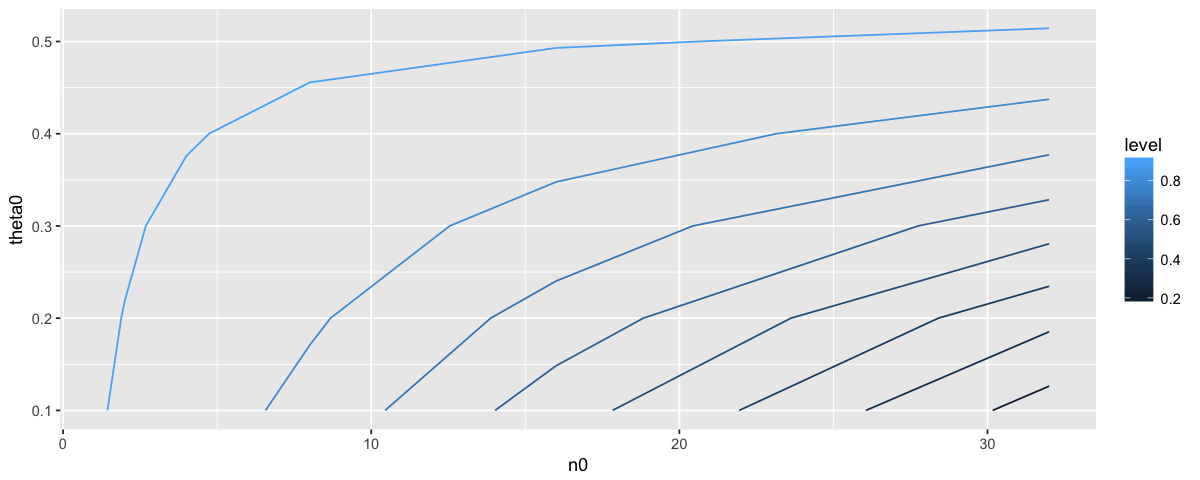

In [127]:
library(dplyr)

k <- 57
n <- 100

data <- expand.grid(
    theta0=seq(from=0.1, to=0.9, by=0.1),
    n0=c(1, 2, 4, 8, 16, 32)) %>%
    mutate(prob = 1 - pbeta(0.5, theta0*n0 + k, (1 - theta0)*n0 + (n-k)))

ggplot(data, aes(x=n0, y=theta0, z=prob)) +
    geom_contour(aes(colour = ..level..))